📝<sup>Este archivo va sin tildes para prevenir posible errores o alertas en la ejecucion</sup>

In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from functions import prettyColumNames

Configuramos pandas para que muestre todas las columnas en salidas tales como .head()

In [3]:
pd.options.display.max_columns = None

# Introducción

Este análisis exploratorio de datos (EDA) tiene como objetivo principal identificar factores que influyen en la cantidad de víctimas fatales en siniestros viales en la Ciudad Autónoma de Buenos Aires (CABA) entre 2016 y 2021. A partir del análisis, se busca proponer estrategias para disminuir la cantidad de víctimas fatales en la ciudad.

# Pregunta de investigación:


¿Qué factores influyen en la cantidad de víctimas fatales en siniestros viales en CABA entre 2016 y 2021, y qué estrategias se pueden implementar para reducirlas?

# Metodología

- Se analizará el archivo dfHechosVictimas.csv, que ya pasó por un proceso de ETL.
- Se utilizarán técnicas de análisis estadístico y visualización de datos para identificar patrones y tendencias.
- Se propondrán estrategias para la reducción de víctimas fatales en base a los resultados del análisis.

# Carga de datos

Los dato fueron procesados en un ETL y ahora los cargaremos para hacer un analisis exploratorio.

In [4]:
dfHechosVictimas = pd.read_csv('../datasource/dfHechosVictimas.csv')

# Analisis

## Transformacion

In [4]:
dfHechosVictimas.head(3)

,ID,N_VICTIMAS,FECHA,SEMESTRE,ANIO,MM,DD,HORA,HH,PARTE_DIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,SEXO,EDAD
0,2016-0001,1,2016-01-01,1,2016,1,1,04:00:00,4,1,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,MOTO_AUTO,MOTO,AUTO,MASCULINO,19.0
1,2016-0002,1,2016-01-02,1,2016,1,2,01:15:00,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,AUTO_PASAJEROS,AUTO,PASAJEROS,MASCULINO,70.0
2,2016-0003,1,2016-01-03,1,2016,1,3,07:00:00,7,2,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,1,MOTO_AUTO,MOTO,AUTO,MASCULINO,30.0


La representación de macho con 1 y hembra con 0 en contextos biológicos y genéticos se debe a convenciones históricas y a la forma en que se han establecido los sistemas de codificación y análisis de datos. Seguiremos esta representacion no sin antes aclarar que, en este caso, el digito uno (1) no significa que la categoria tenga un mayor valor, peso o importancia que el cero (0).

Comencemos representando la variable 'SEXO' de forma binaria ya que se esta forma resulta facil calcular la correlacion.

In [5]:
# Comencemos representando la variable 'SEXO' de forma binaria
diccionario = {'MASCULINO': 1, 'FEMENINO': 0}
dfHechosVictimas['SEXO'] = dfHechosVictimas['SEXO'].map(diccionario)

In [6]:
dfHechosVictimas['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    675
Name: count, dtype: int64

En el dataframe dfHechosVictimas solo hay una victimas por hecho. Eliminaremos la columna 'N_VICTIMAS'.<br>
🗣️ Eliminaremos la columna 'N_VICTIMAS'.

In [7]:
dfHechosVictimas = dfHechosVictimas.drop(columns = ['N_VICTIMAS'])

## Nulos

In [8]:
dfHechosVictimas.head(3)

,ID,FECHA,SEMESTRE,ANIO,MM,DD,HORA,HH,PARTE_DIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,SEXO,EDAD
0,2016-0001,2016-01-01,1,2016,1,1,04:00:00,4,1,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,MOTO_AUTO,MOTO,AUTO,1,19.0
1,2016-0002,2016-01-02,1,2016,1,2,01:15:00,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,AUTO_PASAJEROS,AUTO,PASAJEROS,1,70.0
2,2016-0003,2016-01-03,1,2016,1,3,07:00:00,7,2,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,1,MOTO_AUTO,MOTO,AUTO,1,30.0


In [9]:
dfHechosVictimas.shape

(675, 19)

In [10]:
# Obtener el conteo de nulos por columna de dfHechosVictimas
nullCount = dfHechosVictimas.isnull().sum()

# Obtener el porcentaje de nulos por columna
nullPercentage = (dfHechosVictimas.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
nullInfo = pd.DataFrame({
    'Nulos': nullCount,
    'Porcentaje': nullPercentage
})

# Imprimir el nuevo DataFrame
print(nullInfo)

                 Nulos  Porcentaje
ID                   0    0.000000
FECHA                0    0.000000
SEMESTRE             0    0.000000
ANIO                 0    0.000000
MM                   0    0.000000
DD                   0    0.000000
HORA                 0    0.000000
HH                   0    0.000000
PARTE_DIA            0    0.000000
LUGAR_DEL_HECHO      0    0.000000
TIPO_DE_CALLE        0    0.000000
CALLE                0    0.000000
CRUCE              164   24.296296
COMUNA               0    0.000000
PARTICIPANTES        1    0.148148
VICTIMA              5    0.740741
ACUSADO             21    3.111111
SEXO                 0    0.000000
EDAD                47    6.962963


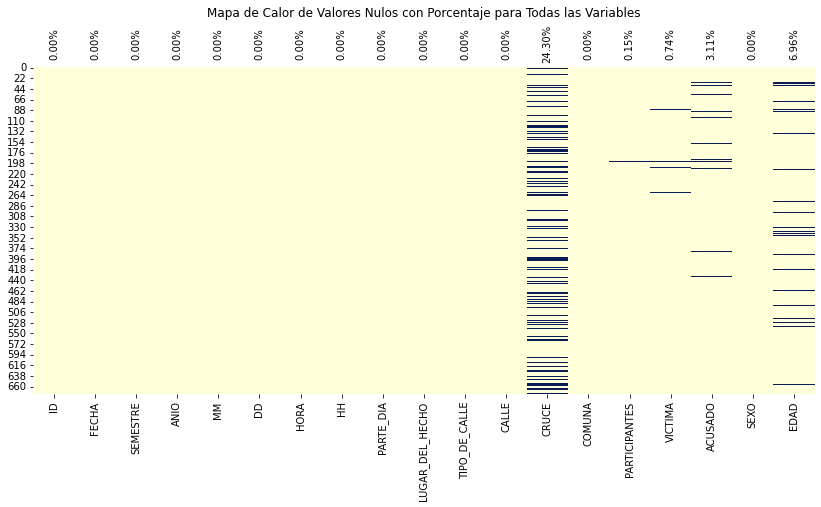

In [11]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = dfHechosVictimas.isnull().mean() * 100

# Crear un mapa de calor (heatmap) de valores nulos con el porcentaje
plt.figure(figsize = (14, 6))
sns.heatmap(dfHechosVictimas.isnull(), cbar=False, cmap="YlGnBu")

# Agregar el texto con el porcentaje de nulos en cada columna
for col, porcentaje in porcentaje_nulos.items():
    plt.text(dfHechosVictimas.columns.get_loc(col) + 0.5, -50, f'{porcentaje:.2f}%', rotation=90,
             va='center', ha='center', color='black')

plt.title('Mapa de Calor de Valores Nulos con Porcentaje para Todas las Variables\n\n\n')
plt.show()

No eliminaremos registros porque son muy pocos y esto hace que el impacto en el balance del dataset sea alto.<br>
### Observaciones
- La columna 'CRUCE' tiene 164 volres nulos lo que representa un 24,3% de las edades. Esto se entiende porque no todos lo siniestros ocurrieron en un cruce.
- La columna 'PARTICIPANTES' tiene solo un valor nulo (0.15%) lo cual no es significativo.
- A la columna 'VICTIMA' le falta el 0.74% de los datos lo cual no es significativo.
- La columna 'ACUSADO' indica que se desconocen a los acusados en 21 hechos.
- La columna 'EDAD' tiene 47 valores nulos (7%)

## Siniestros por año

Analizaremos la tendencia temporal de los siniestros y para ello recurriremos a gráficos de línea.

In [12]:
dfHechosVictimas['ANIO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 675 entries, 0 to 674
Series name: ANIO
Non-Null Count  Dtype
--------------  -----
675 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


In [13]:
# Agrupar por año y contar el número de siniestros en cada año
siniestrosAnio = dfHechosVictimas.groupby('ANIO').size()
siniestrosAnio

ANIO
2016    141
2017    123
2018    137
2019    102
2020     75
2021     97
dtype: int64

In [14]:
dfHechosVictimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               675 non-null    object 
 1   FECHA            675 non-null    object 
 2   SEMESTRE         675 non-null    int64  
 3   ANIO             675 non-null    int64  
 4   MM               675 non-null    int64  
 5   DD               675 non-null    int64  
 6   HORA             675 non-null    object 
 7   HH               675 non-null    int64  
 8   PARTE_DIA        675 non-null    int64  
 9   LUGAR_DEL_HECHO  675 non-null    object 
 10  TIPO_DE_CALLE    675 non-null    object 
 11  CALLE            675 non-null    object 
 12  CRUCE            511 non-null    object 
 13  COMUNA           675 non-null    int64  
 14  PARTICIPANTES    674 non-null    object 
 15  VICTIMA          670 non-null    object 
 16  ACUSADO          654 non-null    object 
 17  SEXO            

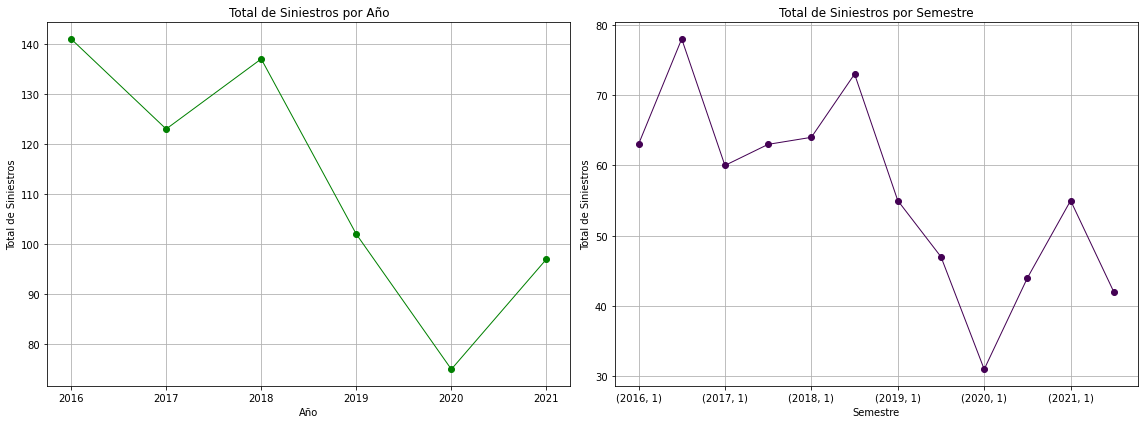

ANIO
2016    141
2017    123
2018    137
2019    102
2020     75
2021     97
Name: ID, dtype: int64

In [15]:
# Calcular el total de siniestros por año
totalSiniestrosPorAnio = dfHechosVictimas.groupby('ANIO')['ID'].count()

# Crear el gráfico de líneas para el total de siniestros por año
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
lineplotAnio = totalSiniestrosPorAnio.plot(
    kind = 'line',
    marker = 'o',
    color = 'green',
    linestyle = '-',
    linewidth = 1
)
lineplotAnio.set_title('Total de Siniestros por Año')
lineplotAnio.set_xlabel('Año')
lineplotAnio.set_ylabel('Total de Siniestros')
plt.grid(True)

# Calcular el total de siniestros por semestre
totalSiniestrosPorSemestre = dfHechosVictimas.groupby(['ANIO', 'SEMESTRE'])['ID'].count()

# Crear el gráfico de líneas para el total de siniestros por semestre
plt.subplot(1, 2, 2)
lineplotSemestre = totalSiniestrosPorSemestre.plot(
    kind = 'line',
    marker = 'o',
    colormap = 'viridis',
    linestyle = '-',
    linewidth = 1
)
lineplotSemestre.set_title('Total de Siniestros por Semestre')
lineplotSemestre.set_xlabel('Semestre')
lineplotSemestre.set_ylabel('Total de Siniestros')

plt.tight_layout()
plt.grid(True)
plt.show()
totalSiniestrosPorAnio

### Observaciones
- La tendencia del quinquenio es un descenso en la siniestralidad de 141 en el 2016 a 97 en el 2021.
- Hay una clara caida en la siniestralidad entre el segundo semestre del 2018 y el primer semestre del 2020.
- El segundo semestre del 2016 es el periodo de tiempo con más siniestros en el quinquenio.
- El primer semestre del 2020 es el punto mas bajo de la siniestralidad del quinquenio.

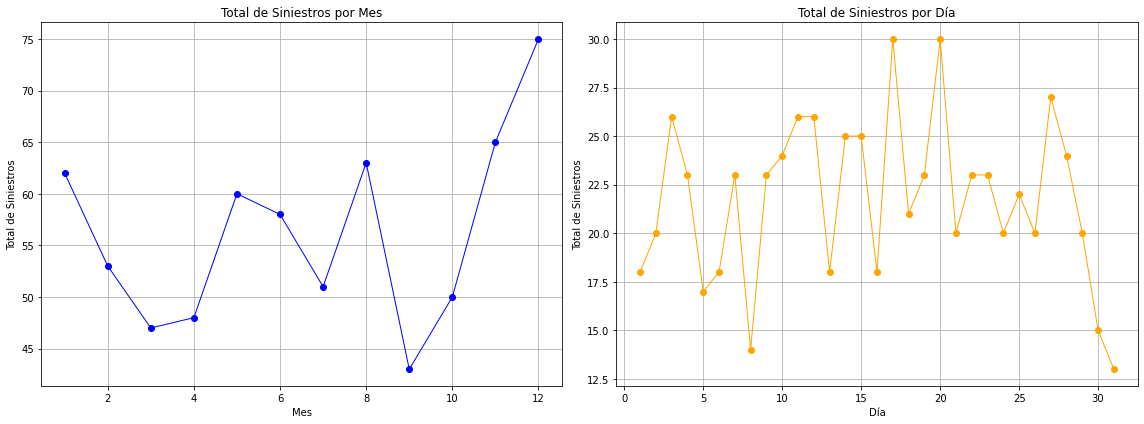

MM    1   2   3   4   5   6   7   8   9   10  11  12
ANIO                                                
2016   8  12  11  11   7  14  11  13  10  12  13  19
2017  10   9   7   7  18   9  12   9   9   9  14  10
2018  14   9   6  13  10  12  14  14   6  12  13  14
2019   9   6  11   9   9  11   5  14   9   6   8   5
2020   8   8   5   3   4   3   2   4   5   6   9  18
2021  13   9   7   5  12   9   7   9   4   5   8   9


DD,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,total
ANIO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,1.0,5.0,5.0,6.0,1.0,3.0,4.0,3.0,2.0,5.0,4.0,4.0,6.0,9.0,5.0,4.0,7.0,2.0,4.0,4.0,4.0,3.0,6.0,6.0,7.0,7.0,7.0,6.0,5.0,3.0,3.0,141
2017,3.0,3.0,4.0,6.0,4.0,5.0,7.0,1.0,4.0,4.0,5.0,5.0,5.0,1.0,5.0,5.0,6.0,2.0,5.0,3.0,1.0,6.0,5.0,5.0,4.0,5.0,5.0,3.0,1.0,3.0,2.0,123
2018,5.0,5.0,6.0,4.0,3.0,1.0,3.0,3.0,6.0,5.0,6.0,8.0,3.0,4.0,6.0,4.0,5.0,8.0,5.0,5.0,5.0,5.0,2.0,3.0,4.0,3.0,4.0,7.0,4.0,2.0,3.0,137
2019,3.0,NaN,4.0,3.0,4.0,4.0,3.0,5.0,5.0,2.0,3.0,3.0,2.0,5.0,3.0,2.0,8.0,3.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,102
2020,3.0,1.0,2.0,4.0,5.0,NaN,4.0,1.0,3.0,3.0,2.0,4.0,1.0,3.0,1.0,1.0,3.0,2.0,6.0,4.0,1.0,NaN,2.0,3.0,1.0,NaN,5.0,2.0,4.0,4.0,NaN,75
2021,3.0,6.0,5.0,NaN,NaN,5.0,2.0,1.0,3.0,5.0,6.0,2.0,1.0,3.0,5.0,2.0,1.0,4.0,1.0,9.0,5.0,5.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,4.0,97
total,18.0,20.0,26.0,23.0,17.0,18.0,23.0,14.0,23.0,24.0,26.0,26.0,18.0,25.0,25.0,18.0,30.0,21.0,23.0,30.0,20.0,23.0,23.0,20.0,22.0,20.0,27.0,24.0,20.0,15.0,13.0,675


In [16]:
# Calcular el total de siniestros por mes
totalSiniestrosPorMes = dfHechosVictimas.groupby('MM')['ID'].count()

# Crear el primer gráfico de líneas para el total de siniestros por mes
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
lineplotMes = totalSiniestrosPorMes.plot(
    kind = 'line',
    marker = 'o',
    color = 'blue',
    linestyle = '-',
    linewidth = 1
)
lineplotMes.set_title('Total de Siniestros por Mes')
lineplotMes.set_xlabel('Mes')
lineplotMes.set_ylabel('Total de Siniestros')
plt.grid(True)

# Calcular el total de siniestros por día
totalSiniestrosPorDia = dfHechosVictimas.groupby('DD')['ID'].count()
totalSiniestrosPorDia = totalSiniestrosPorDia.groupby('DD').sum()

# Crear el segundo gráfico de líneas para el total de siniestros por día
plt.subplot(1, 2, 2)
lineplotDia = totalSiniestrosPorDia.plot(
    kind = 'line',
    marker = 'o',
    color = 'orange',
    linestyle = '-',
    linewidth = 1
)
lineplotDia.set_title('Total de Siniestros por Día')
lineplotDia.set_xlabel('Día')
lineplotDia.set_ylabel('Total de Siniestros')

# Mostrar los gráficos
plt.tight_layout()
plt.grid(True)
plt.show()

print(dfHechosVictimas.groupby(['ANIO', 'MM'])['ID'].count().unstack())

# Calcular el total de siniestros por día y mes
dfHechosVictimas.pivot_table(
    index = 'ANIO',
    columns = 'DD',
    values = 'ID',
    aggfunc = 'count',
    margins = True,
    margins_name = 'total'
)

### Observaciones
- Diciembre tiende a ser el mes con mayor numero de siniestros.
- Agosto tiende a ser el mes de menor siniestralidad.
- Los primeros tres meses del año tiende a bajar el numero de casos mientras que en los ultimos tres meses tiende a subir.
- El dia ocho de cada mes es el que presenta menor numero de casos. No tomamos en cuenta el 31 de cada mes porque al año solo hay siete.
- Los dias 17 y 20 de cada mes son los que presentan mayor numero de casos.
- Hay una clara tendencia a disminuir la siniestralidad en la ultima semana de cada mes.

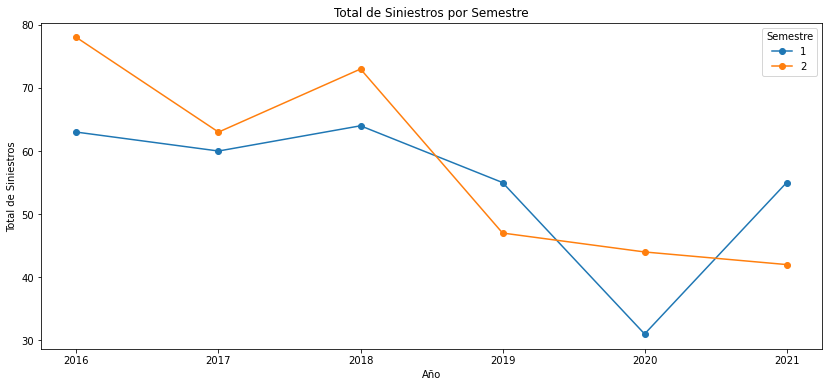

In [17]:
# Suponiendo que 'dfHechosVictimas' es el DataFrame que contiene la información sobre los siniestros y las víctimas

# Calcular el total de siniestros por semestre
total_siniestros_por_semestre = dfHechosVictimas.groupby(['ANIO', 'SEMESTRE'])['ID'].count().unstack()

# Crear el gráfico de líneas para el total de siniestros por semestre
fig, ax = plt.subplots(figsize=(14, 6))  # Establecer el tamaño de la figura
total_siniestros_por_semestre.plot(kind='line', marker='o', ax=ax)
ax.set_title('Total de Siniestros por Semestre')
ax.set_xlabel('Año')
ax.set_ylabel('Total de Siniestros')
ax.legend(title='Semestre')

# Mostrar el gráfico
plt.show()

### Observaciones
- Hay una tendencia a mayor siniestralidad en la segunda mitad del año.

## Correlacion

Creemos graficas tipo 'boxplot' de las columnas numericas

In [18]:
dfHechosVictimas.describe().columns.to_list()

['SEMESTRE', 'ANIO', 'MM', 'DD', 'HH', 'PARTE_DIA', 'COMUNA', 'SEXO', 'EDAD']

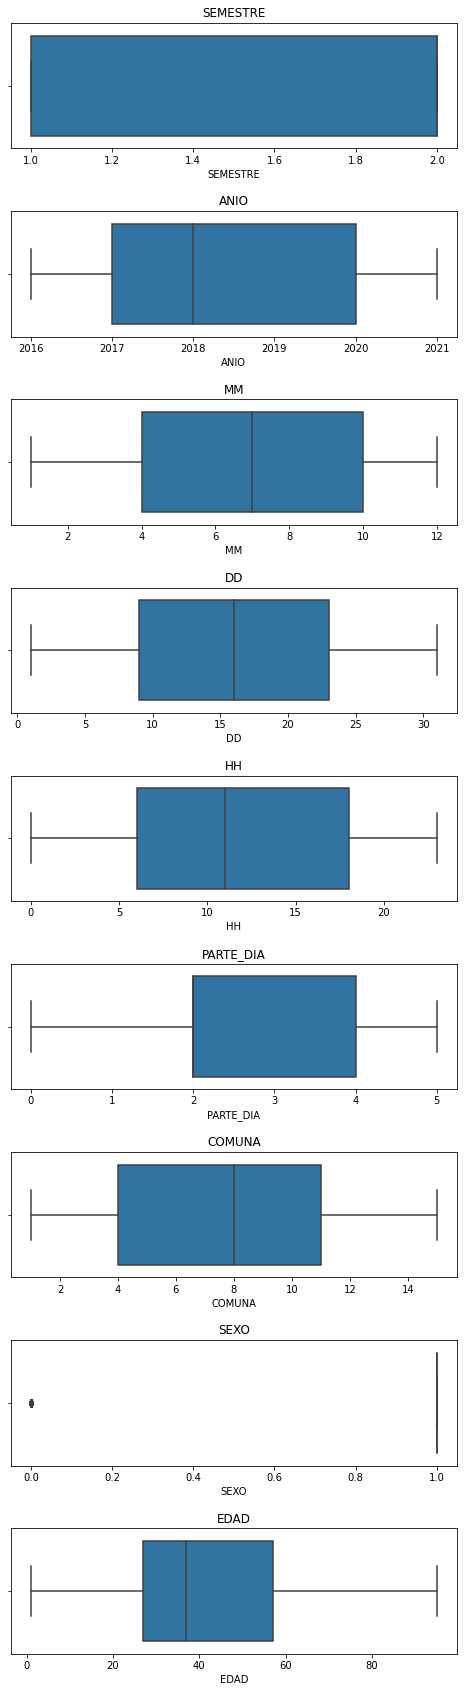

In [19]:
cols =  dfHechosVictimas.describe().columns.to_list()
#cols =  ['N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HH', 'ALTURA', 'COMUNA']
#
fig, ax = plt.subplots(nrows = 9, ncols = 1, figsize = (8, 30))
fig.subplots_adjust(hspace = 0.5)

for i, col in enumerate(cols):
    sns.boxplot(x = col, data = dfHechosVictimas, ax = ax[i])
    ax[i].set_title(col)

Inspeccionemos la forma en la que esta distribuida la frecuencia de los valores en un conjunto de datos ya que puede proporcionarnos algunas pistas sobre la presencia de outliers.

Text(0.5, 0, 'Tipo de Acusado')

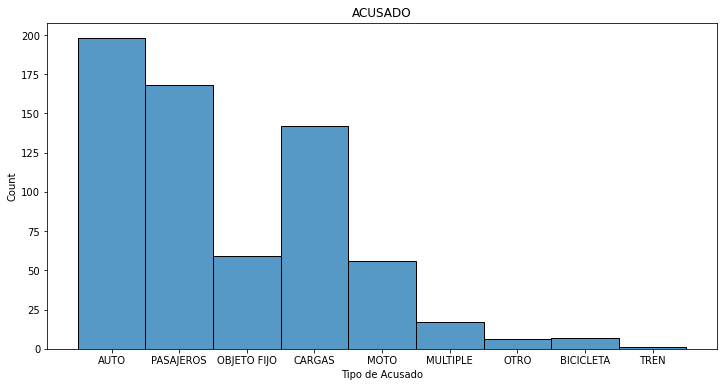

In [20]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el ancho y alto según tus necesidades
# Create a histogram using Seaborn
g = sns.histplot(data = dfHechosVictimas, x = 'ACUSADO', binwidth = 0.2)
# Add labels
g.set_title('ACUSADO')
g.set_xlabel('Tipo de Acusado')

### Observaciones
- Los autos y los pasajeros de unidade de trasnporte publico son los que causan la mayoria de accidentes.
- Los trenes intervienen muy poco en los siniestrosn.

In [21]:
dfHechosVictimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               675 non-null    object 
 1   FECHA            675 non-null    object 
 2   SEMESTRE         675 non-null    int64  
 3   ANIO             675 non-null    int64  
 4   MM               675 non-null    int64  
 5   DD               675 non-null    int64  
 6   HORA             675 non-null    object 
 7   HH               675 non-null    int64  
 8   PARTE_DIA        675 non-null    int64  
 9   LUGAR_DEL_HECHO  675 non-null    object 
 10  TIPO_DE_CALLE    675 non-null    object 
 11  CALLE            675 non-null    object 
 12  CRUCE            511 non-null    object 
 13  COMUNA           675 non-null    int64  
 14  PARTICIPANTES    674 non-null    object 
 15  VICTIMA          670 non-null    object 
 16  ACUSADO          654 non-null    object 
 17  SEXO            

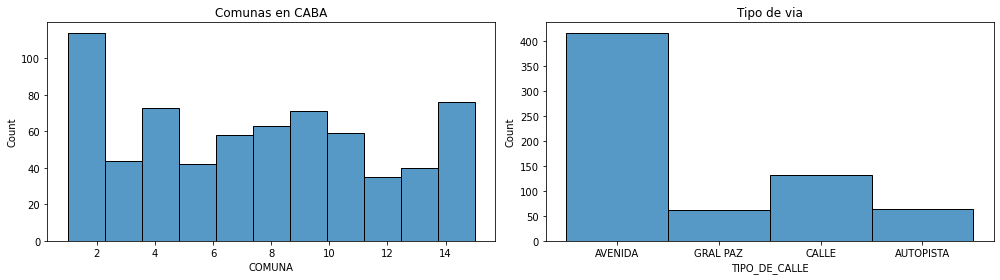

In [22]:
# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))

# Crear el primer histograma con el título 'COMUNA'
g1 = sns.histplot(data = dfHechosVictimas, x = 'COMUNA', ax = ax1)
g1.set_title('Comunas en CABA')

# Crear el segundo histograma con el título 'HORA'
g2 = sns.histplot(data = dfHechosVictimas, x = 'TIPO_DE_CALLE', ax = ax2)
g2.set_title('Tipo de via')

# Ajustar los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

In [23]:
dfHechosVictimas['COMUNA'].value_counts()

COMUNA
1     89
4     73
9     71
8     63
7     58
3     44
15    43
13    40
12    35
14    33
11    31
10    28
2     25
5     22
6     20
Name: count, dtype: int64

### Observaciones
- La mayoria de los hechos ocurren en la comuna 1.
- La mayoria de los hechos ocurren en las avenidas.

In [24]:
dfHechosVictimas['CRUCE'].value_counts().head(10)

CRUCE
PAZ, GRAL. AV.                14
ESCALADA AV.                   9
RIVADAVIA AV.                  8
INDEPENDENCIA AV.              7
BALBIN, RICARDO, DR. AV.       6
DEL LIBERTADOR AV.             6
PUEYRREDON AV.                 6
9 DE JULIO AV.                 5
ALBERDI, JUAN BAUTISTA AV.     5
PERON, EVA AV.                 5
Name: count, dtype: int64

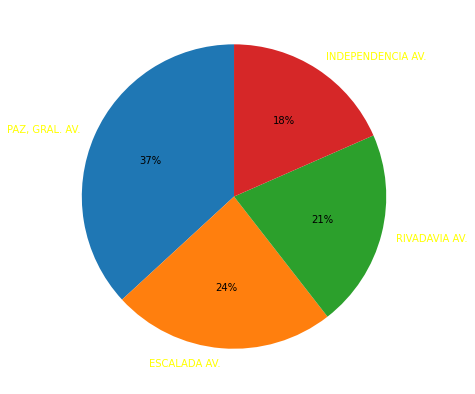

In [25]:
# Datos de los cuatro primeros cruces
cruces = ['PAZ, GRAL. AV.', 'ESCALADA AV.', 'RIVADAVIA AV.', 'INDEPENDENCIA AV.']
frecuencias = [14, 9, 8, 7]

# Crear el gráfico de dona con etiquetas de color amarillo, tamaño más grande y frecuencias
fig, ax = plt.subplots(figsize=(7, 7))  # Tamaño más grande
pie = ax.pie(frecuencias, labels=cruces, startangle=90, autopct='%1.0f%%')
plt.setp(pie[1], color='yellow')  # Establecer el color de las etiquetas

print('Cruces cn mas siniestross')

# Mostrar el gráfico
plt.show()

### Observaciones
- El cruce mas peligroso es PAZ, GRAL AV.

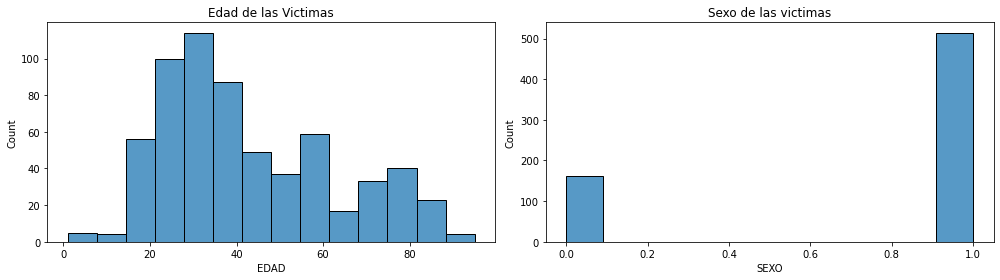

In [26]:
# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Crear el primer histograma con el título 'COMUNA'
g1 = sns.histplot(data=dfHechosVictimas, x='EDAD', ax=ax1)
g1.set_title('Edad de las Victimas')

# Crear el segundo histograma con el título 'HORA'
g2 = sns.histplot(data=dfHechosVictimas, x='SEXO', ax=ax2)
g2.set_title('Sexo de las victimas')

# Ajustar los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

### Observaciones
- La mayoria de los hechos le ocurren a personas de entre 20 y 40 años.
- Son mucho mas hombred que mujeres involucrados en los siniestros.

In [27]:
dfHechosVictimas.describe().columns.to_list()


['SEMESTRE', 'ANIO', 'MM', 'DD', 'HH', 'PARTE_DIA', 'COMUNA', 'SEXO', 'EDAD']

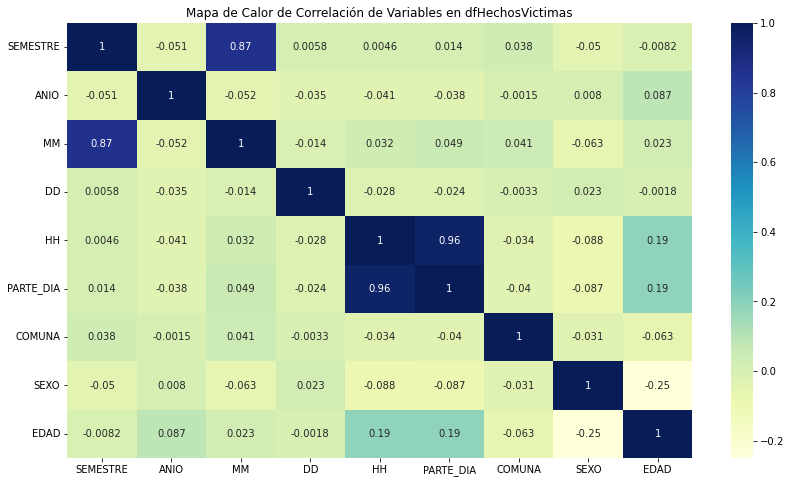

In [28]:
# Seleccionar solo las columnas numéricas para calcular la correlación
df_numeric = dfHechosVictimas.select_dtypes(include = ['int64', 'int8', 'float64'])

# Crear el mapa de calor
plt.figure(figsize = (14, 8))
heatmap = sns.heatmap(df_numeric.corr(), annot = True, cmap = "YlGnBu")
plt.title('Mapa de Calor de Correlación de Variables en dfHechosVictimas')
plt.show()

### Observaciones
- Hay una alta correacion entre 'HH' (franja horaria) y PARTE_DIA.
- Hay una alta correlacion entre meses y semestre.

In [29]:
# Realizar la codificación one-hot
df_encoded = pd.get_dummies(dfHechosVictimas, columns=['TIPO_DE_CALLE', 'VICTIMA', 'ACUSADO'])


In [30]:
# Mostrar el DataFrame con las variables codificadas
df_encoded.head(3)

,ID,FECHA,SEMESTRE,ANIO,MM,DD,HORA,HH,PARTE_DIA,LUGAR_DEL_HECHO,CALLE,CRUCE,COMUNA,PARTICIPANTES,SEXO,EDAD,TIPO_DE_CALLE_AUTOPISTA,TIPO_DE_CALLE_AVENIDA,TIPO_DE_CALLE_CALLE,TIPO_DE_CALLE_GRAL PAZ,VICTIMA_AUTO,VICTIMA_BICICLETA,VICTIMA_CARGAS,VICTIMA_MOTO,VICTIMA_MOVIL,VICTIMA_PASAJEROS,VICTIMA_PEATON,ACUSADO_AUTO,ACUSADO_BICICLETA,ACUSADO_CARGAS,ACUSADO_MOTO,ACUSADO_MULTIPLE,ACUSADO_OBJETO FIJO,ACUSADO_OTRO,ACUSADO_PASAJEROS,ACUSADO_TREN
0,2016-0001,2016-01-01,1,2016,1,1,04:00:00,4,1,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,MOTO_AUTO,1,19.0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,2016-0002,2016-01-02,1,2016,1,2,01:15:00,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,AUTO_PASAJEROS,1,70.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2016-0003,2016-01-03,1,2016,1,3,07:00:00,7,2,AV ENTRE RIOS 2034,ENTRE RIOS AV.,NaN,1,MOTO_AUTO,1,30.0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False


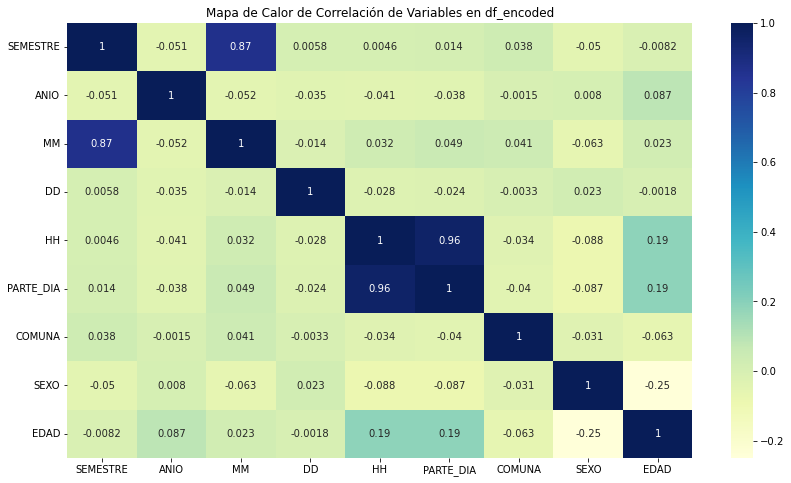

In [31]:
# Seleccionar solo las columnas numéricas para calcular la correlación
df_numeric = df_encoded.select_dtypes(include = ['int64', 'int8', 'float64'])

# Crear el mapa de calor
plt.figure(figsize = (14, 8))
heatmap = sns.heatmap(df_numeric.corr(), annot = True, cmap = "YlGnBu")
plt.title('Mapa de Calor de Correlación de Variables en df_encoded')
plt.show()

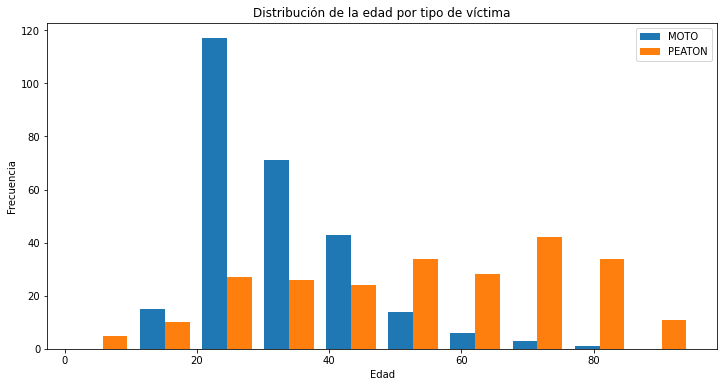

In [32]:
# Análisis por tipo de víctima
victimaMoto = df_encoded[df_encoded["VICTIMA_MOTO"] == True]
victimaPeaton = df_encoded[df_encoded["VICTIMA_PEATON"] == True]

# Comparación de edad por tipo de víctima
plt.figure(figsize = (12, 6))
plt.hist([victimaMoto["EDAD"], victimaPeaton["EDAD"]], label = ["MOTO", "PEATON"])
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la edad por tipo de víctima")
plt.legend()
plt.show()

### Observaciones
- La mayoria de las victimas en moto tenian entre 20 y 40 años de edad.
- En el rango del adulto mayor (60~100 años)resulta ser la victima mas frecuente de siniestros.

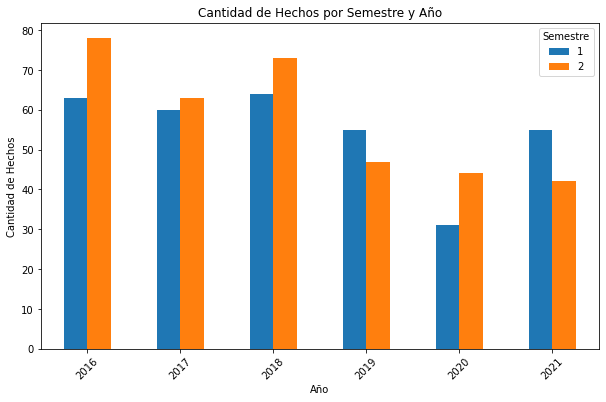

In [35]:
# Contar la cantidad de hechos en cada semestre por año
conteoSemestresAnio = dfHechosVictimas.groupby(['ANIO', 'SEMESTRE']).size().unstack()

# Crear el gráfico de barras
conteoSemestresAnio.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de Hechos por Semestre y Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Hechos')
plt.xticks(rotation=45)
plt.legend(title='Semestre')
plt.show()

### Observaciones
- En la mayoria de los años hubo mas frecuencia de siniestros en el segundo semestre del año.
- Del 2019 al 2021 se nota un descenso general en el numero de siniestros.

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

In [36]:
# Calcular los hechos por semestre
df_hechos_semestre = dfHechosVictimas.groupby(["ANIO", "SEMESTRE"]).size().rename("HECHOS").reset_index()

# Calcular la variación porcentual
df_hechos_semestre["PORCENTAJE_VARIACION"] = df_hechos_semestre["HECHOS"].pct_change().round(3) * 100

# Calcular el objetivo
objetivo = -10 # El 10 porciento
df_hechos_semestre["OBJETIVO"] = (
    df_hechos_semestre["HECHOS"].diff() / df_hechos_semestre["HECHOS"].shift(1)
) <= (objetivo/100)

# Convertir TRUE y FALSE a 0 y 1 en la columna OBJETIVO
df_hechos_semestre["OBJETIVO"] = df_hechos_semestre["OBJETIVO"].map({True: 1, False: 0})

df_hechos_semestre

,ANIO,SEMESTRE,HECHOS,PORCENTAJE_VARIACION,OBJETIVO
0,2016,1,63,NaN,0
1,2016,2,78,23.8,0
2,2017,1,60,-23.1,1
3,2017,2,63,5.0,0
4,2018,1,64,1.6,0
5,2018,2,73,14.1,0
6,2019,1,55,-24.7,1
7,2019,2,47,-14.5,1
8,2020,1,31,-34.0,1
9,2020,2,44,41.9,0


### Observaciones
- Se logra el objetivo de reducir en un 10% la tasa de homicidios en los últimos seis meses en los siguientes cinco semestres:
  - Primer semestre del 2017
  - Primer semestre del 2019
  - Segundo semestre del 2019
  - Primer semestre del 2020
  - Segundo semestre del 2021


## Propuestas
### Estrategias para la reducción de víctimas fatales en base al análisis:
1. Enfocarse en los tipos de víctimas más vulnerables:
   - Motociclistas: Implementar campañas de concienciación a jovenes motociclistas sobre la seguridad vial para este grupo, incluyendo el uso obligatorio de cascos y equipamiento adecuado.
   - Peatones: Mejorar la infraestructura vial para la seguridad de peatones pensando en el adulto mayor, como la construcción de aceras, pasos de peatones y ciclovías.
2. Reducir la velocidad en zonas de alto riesgo:
   - Implementar en vias de alto riesgo como las avenidas General Paz, Escalada, Rivadavia e Independencia medidas de control de velocidad como reductores de velocidad, radares y mayor presencia policial.
3. Mejorar la atención médica en caso de accidentes:
   - Implementar programas de formación para el personal de primeros auxilios y atención médica en casos de accidentes de tráfico.
   - Asegurar la disponibilidad de recursos médicos y ambulancias en zonas con alta incidencia de accidentes.
   - Enfocar dicha formacion y recursos a la comuna 1 en donde estan los barrios Retiro, San Nicolas, Puerto Madero, San Telmo, Montserrat y Constitucion.
4. Fortalecer las medidas de control y sanción:
   - Aplicar multas y sanciones más severas para conductores que infrinjan las normas de tránsito, como conducir bajo la influencia del alcohol o exceso de velocidad.
   - Implementar programas de reeducación vial para conductores que infrinjan las normas de tránsito.
5. Recopilación y análisis de datos:
   - Implementar un sistema de recopilación de datos más robusto y preciso sobre accidentes de tránsito, incluyendo información sobre las causas, las víctimas y las condiciones ambientales.
   - Utilizar el análisis de datos para identificar patrones y factores de riesgo en los accidentes de tránsito.
6. Campañas de concienciación vial:
   - Implementar campañas de concienciación vial dirigidas a toda la población, en especial a las comunas 1, 4, 9 y 8, incluyendo conductores, motociclistas, peatones y ciclistas.
   - Enfatizar la importancia de la responsabilidad individual en la seguridad vial.
7. Investigación e innovación:
   - Invertir en investigación para desarrollar nuevas tecnologías y estrategias para la prevención de accidentes de tránsito.
   - Implementar programas de innovación para mejorar la seguridad vial.
8. Cooperación entre diferentes actores:
   - Fomentar la cooperación entre el gobierno, las organizaciones no gubernamentales, las empresas y la sociedad civil para la prevención de accidentes de tránsito.
   - Implementar programas de participación ciudadana en la planificación y evaluación de las políticas de seguridad vial.

<br>

Es importante destacar que la implementación de estas estrategias requiere un enfoque multidisciplinario y el compromiso de todos los actores involucrados en la seguridad vial de CABA.